# This script shows linear regression with multiple features as well as scalling with normalization

In [1]:
#importing needed modules
import numpy as np
from pathlib import Path

In [2]:
#reading the dataset
data_folder = Path(r'C:\Users\anast\PycharmProjects\ML\machine-learning-ex1\machine-learning-ex1\ex1')
file = data_folder / 'ex1data2.txt'
dataset = np.loadtxt(file, delimiter=',')

In [3]:
dataset.shape

(47, 3)

In [4]:
dataset.max(axis=0)

array([4.478e+03, 5.000e+00, 6.999e+05])

In [5]:
dataset.min(axis=0)

array([8.520e+02, 1.000e+00, 1.699e+05])

In [6]:
#Let's apply some scalling with mean normalization
mean = dataset[:,0:2].mean(axis=0)
sigma = dataset[:,0:2].std(axis=0)
dataset[:,0:2] = np.divide(np.subtract(dataset[:,0:2], mean), sigma)

In [7]:
dataset.min(axis=0)

array([-1.46104938e+00, -2.88269044e+00,  1.69900000e+05])

In [8]:
dataset.max(axis = 0)

array([3.15099326e+00, 2.43050370e+00, 6.99900000e+05])

In [9]:
#After properly checking that values have been normalized, let's use our gradient descendent function
from LinearRegression import *

In [10]:
#Getting ready with the dataset
Y = dataset[:,2]
m = len(Y)
X = np.concatenate((np.ones((m,1)), dataset[:,0:2]), axis=1)

In [11]:
X.shape

(47, 3)

In [12]:
#Getting ready with the theta values
theta = np.zeros(3)

In [13]:
theta

array([0., 0., 0.])

In [16]:
import LinearRegression as lr

In [17]:
iterations = 150
alpha = 0.01
solution, record = lr.gradient_descent(X, Y, theta, alpha, iterations, debugging=True)

In [18]:
solution

array([265027.66771297,  74644.49044624,  18496.38493332])

In [19]:
len(record)

150

In [20]:
#Calculating the cost function for each record
J1 = [cost_function(X,Y,i) for i in record]
#Comment lines below to only see the gradient descent path calculated
J2 = [cost_function(X,Y,i) for i in lr.gradient_descent(X,Y, theta, 0.02, iterations, debugging=True)[1]]
J3 = [cost_function(X,Y,i) for i in lr.gradient_descent(X,Y, theta, 0.03, iterations, debugging=True)[1]]

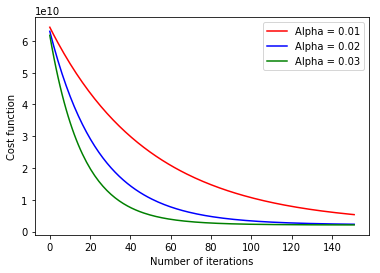

In [22]:
#importing plotting modules
import matplotlib.pyplot as plt
vals = np.linspace(0,151,150)
plt.plot(vals, J1, color='r', label = 'Alpha = 0.01')
#Comment the two plot commands below to not see the a comparison
plt.plot(vals, J2, color = 'b', label = 'Alpha = 0.02')
plt.plot(vals, J3, color = 'g', label = 'Alpha = 0.03')
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.legend()
plt.show()

# We are going to illustrate how the Normal Equation compares with our results

In [23]:
theta_normal = lr.normal_equation(X,Y)

In [24]:
theta_normal

array([340412.65957447, 109447.79646964,  -6578.35485416])

In [25]:
cost_function(X,Y, theta_normal)

2043280050.602828

In [26]:
cost_function(X,Y, solution)

5316060560.933568

As we can see, our solution is definitely not the best. Logically, our learning rates was too big, and few iterations so converge has not been achieved? Let's test what happens once we run the gradient descent for 100 times more iterations

In [27]:
iterations = 1500
solution = lr.gradient_descent(X, Y, theta, alpha, iterations, debugging=False)

In [28]:
solution

array([340412.56301439, 109370.05670466,  -6500.61509507])

In [29]:
cost_function(X,Y, solution)

2043282709.9327548

### Yup, that was it.